<a href="https://colab.research.google.com/github/Diajeng17/-Diajeng-Ganis-Samantha-Murpri-TugasMachineLearning-/blob/main/Mobile_Legends_Tactics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Data Science Segmentasi Win Rate Mobile Legends Tactics**
kode program ini merupakan penerapan segmentasi win rate untuk game mobile legends, dengan menganalisis setiap fitur
pada datasheet dengan menemukan pola pada data untuk mengetahui komposisi rule dan hero yang pas untuk menghasilkan taktik yang efektif
dalam bermain game mobile legends dengan menghasilkan win rate pada setiap pertandingan

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## **1 Data Preprocesing**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

%matplotlib inline
warnings.filterwarnings('ignore')

In [3]:
td_MLBB = pd.read_csv('../content/drive/MyDrive/(Diajeng Ganis Samantha Murpri)TM9 dataset /mlbb_heros.csv')
print(td_MLBB)

     hero_name      role  defense_overall  offense_overall  \
0      Terizla   fighter              7.0              8.0   
1       Martis   fighter              6.0              8.0   
2        Grock      tank              8.0              5.0   
3     Carmilla   support              5.0              5.0   
4      Irithel  marksman              5.0              5.0   
..         ...       ...              ...              ...   
98   Esmeralda      mage              7.0              6.0   
99   Benedetta  assassin              5.0              6.0   
100      Brody  marksman              6.0              9.0   
101    Natalia  assassin              6.0              9.0   
102   Silvanna   fighter              6.0              6.0   

     skill_effect_overall  difficulty_overall  movement_spd  magic_defense  \
0                     6.0                 6.0           255             10   
1                     5.0                 5.0           260             10   
2                    

### 1.1 melihat informasi pada datasheet

In [ ]:
print(td_MLBB.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   hero_name             103 non-null    object 
 1   role                  103 non-null    object 
 2   defense_overall       103 non-null    float64
 3   offense_overall       103 non-null    float64
 4   skill_effect_overall  103 non-null    float64
 5   difficulty_overall    103 non-null    float64
 6   movement_spd          103 non-null    int64  
 7   magic_defense         103 non-null    int64  
 8   mana                  103 non-null    int64  
 9   hp_regen              103 non-null    int64  
 10  physical_atk          103 non-null    int64  
 11  physical_defense      103 non-null    int64  
 12  hp                    103 non-null    int64  
 13  attack_speed          103 non-null    float64
 14  mana_regen            103 non-null    float64
 15  win_rate              1

In [ ]:
print("jumlah baris pada datasheet : ", td_MLBB.shape[0])
print("jumlah kolom pada datasheet : ", td_MLBB.shape[1])

jumlah baris pada datasheet :  103
jumlah kolom pada datasheet :  19


In [ ]:
td_MLBB.keys()

Index(['hero_name', 'role', 'defense_overall', 'offense_overall',
       'skill_effect_overall', 'difficulty_overall', 'movement_spd',
       'magic_defense', 'mana', 'hp_regen', 'physical_atk', 'physical_defense',
       'hp', 'attack_speed', 'mana_regen', 'win_rate', 'pick_rate', 'ban_rate',
       'release_year'],
      dtype='object')

### 1.2 cek kolom fitur yang mengalami missing value

In [ ]:
print("Jumlah data yang mengalami missing value : ", td_MLBB.isnull().sum().sum())

Jumlah data yang mengalami missing value :  0


### 1.3 cek data yang mengalami duplikasi

In [ ]:
duplicated_rows_df = td_MLBB[td_MLBB.duplicated()]
print("number of duplicated : ", duplicated_rows_df.shape)

number of duplicated :  (0, 19)


In [ ]:
td_MLBB = td_MLBB.drop_duplicates()
td_MLBB.count()

hero_name               103
role                    103
defense_overall         103
offense_overall         103
skill_effect_overall    103
difficulty_overall      103
movement_spd            103
magic_defense           103
mana                    103
hp_regen                103
physical_atk            103
physical_defense        103
hp                      103
attack_speed            103
mana_regen              103
win_rate                103
pick_rate               103
ban_rate                103
release_year            103
dtype: int64

## **2. Exploratory data analysis**

In [ ]:
from matplotlib import rcParams
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

%matplotlib inline

plt.rcParams.update({'figure.figsize': (12.0, 8.0)})
plt.rcParams.update({'font.size':14})

sns.set(color_codes = True)
sns.set_style("whitegrid")
sns.set_theme(style = "white", palette = None)

plt.style.use('ggplot')

### 2.1 visualisasi grafik batang jumlah role hero yang paling banyak digunakan
<th>
    <tr>
        <td>fighter</td>
        <td>mage</td>
        <td>marksman</td>
        <td>tank</td>
        <td>assassin</td>
        <td>support</td>
    </tr>
</th>

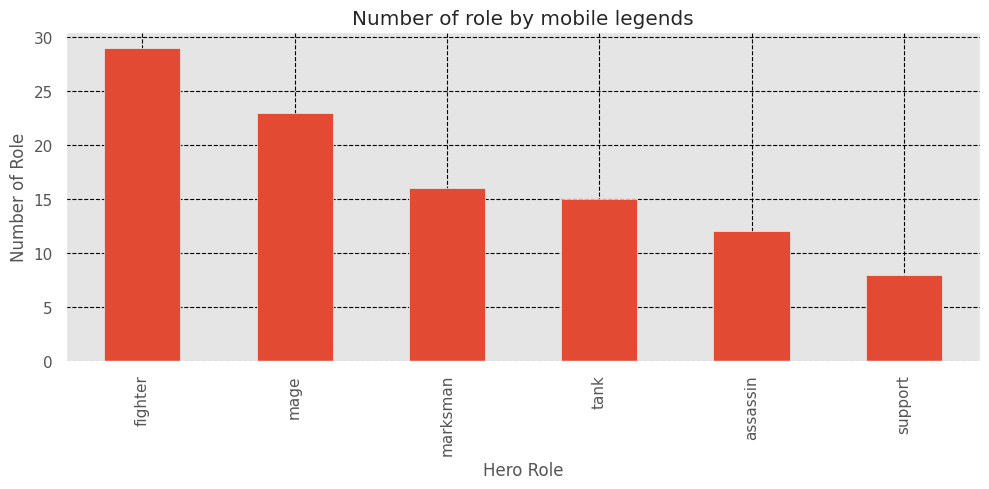

In [ ]:
td_MLBB.role.value_counts().nlargest(40).plot(kind='bar', figsize=(10, 5))
plt.title("Number of role by mobile legends")
plt.ylabel("Number of Role")
plt.xlabel("Hero Role")
plt.grid(color = 'black', linestyle = '--', linewidth = 0.8)
plt.tight_layout()
plt.show()

### 2.2 visualisasi grafik heatmap untuk melihat korelasi pada kolom data

<Axes: >

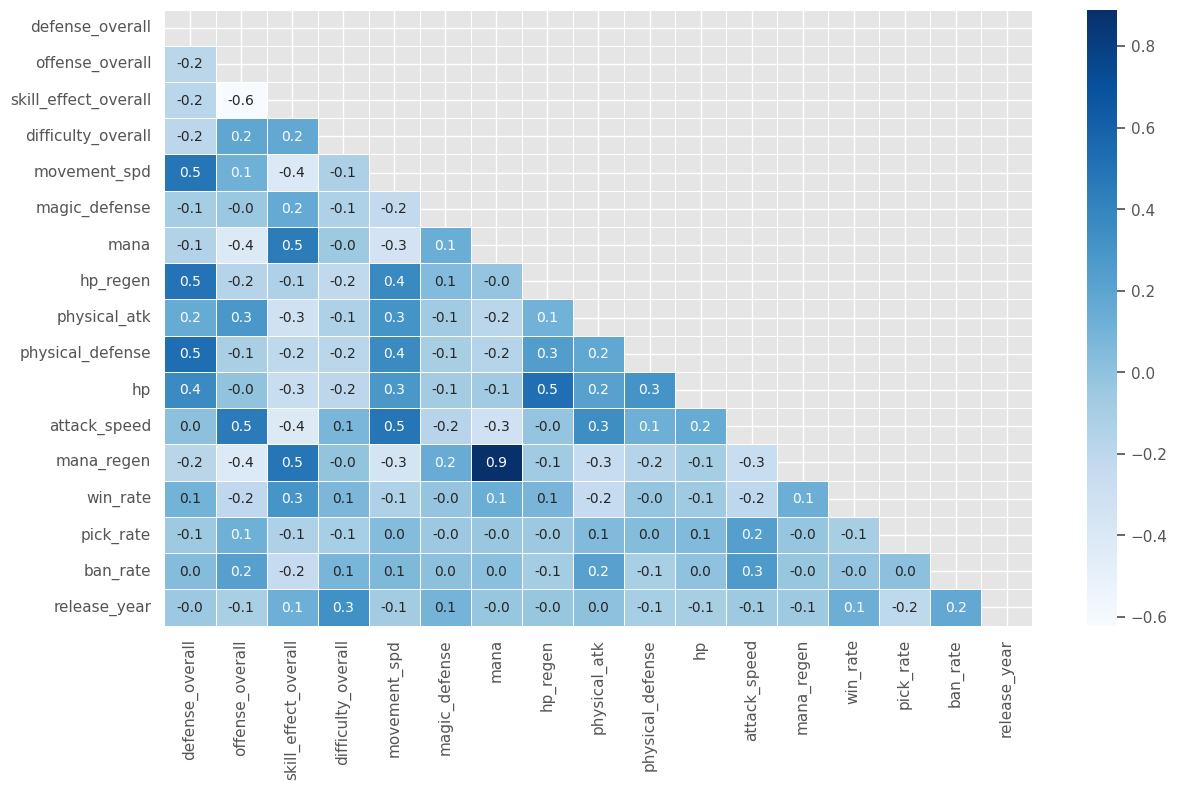

In [ ]:
numerical_cols = td_MLBB.select_dtypes(include=np.number).columns
td_MLBB.corr = td_MLBB[numerical_cols].corr()

plt.figure(figsize=(14, 8))
sns.heatmap(td_MLBB.corr, cmap="Blues", linewidths=0.5, fmt= '.1f', annot=True, mask=np.triu(td_MLBB.corr))

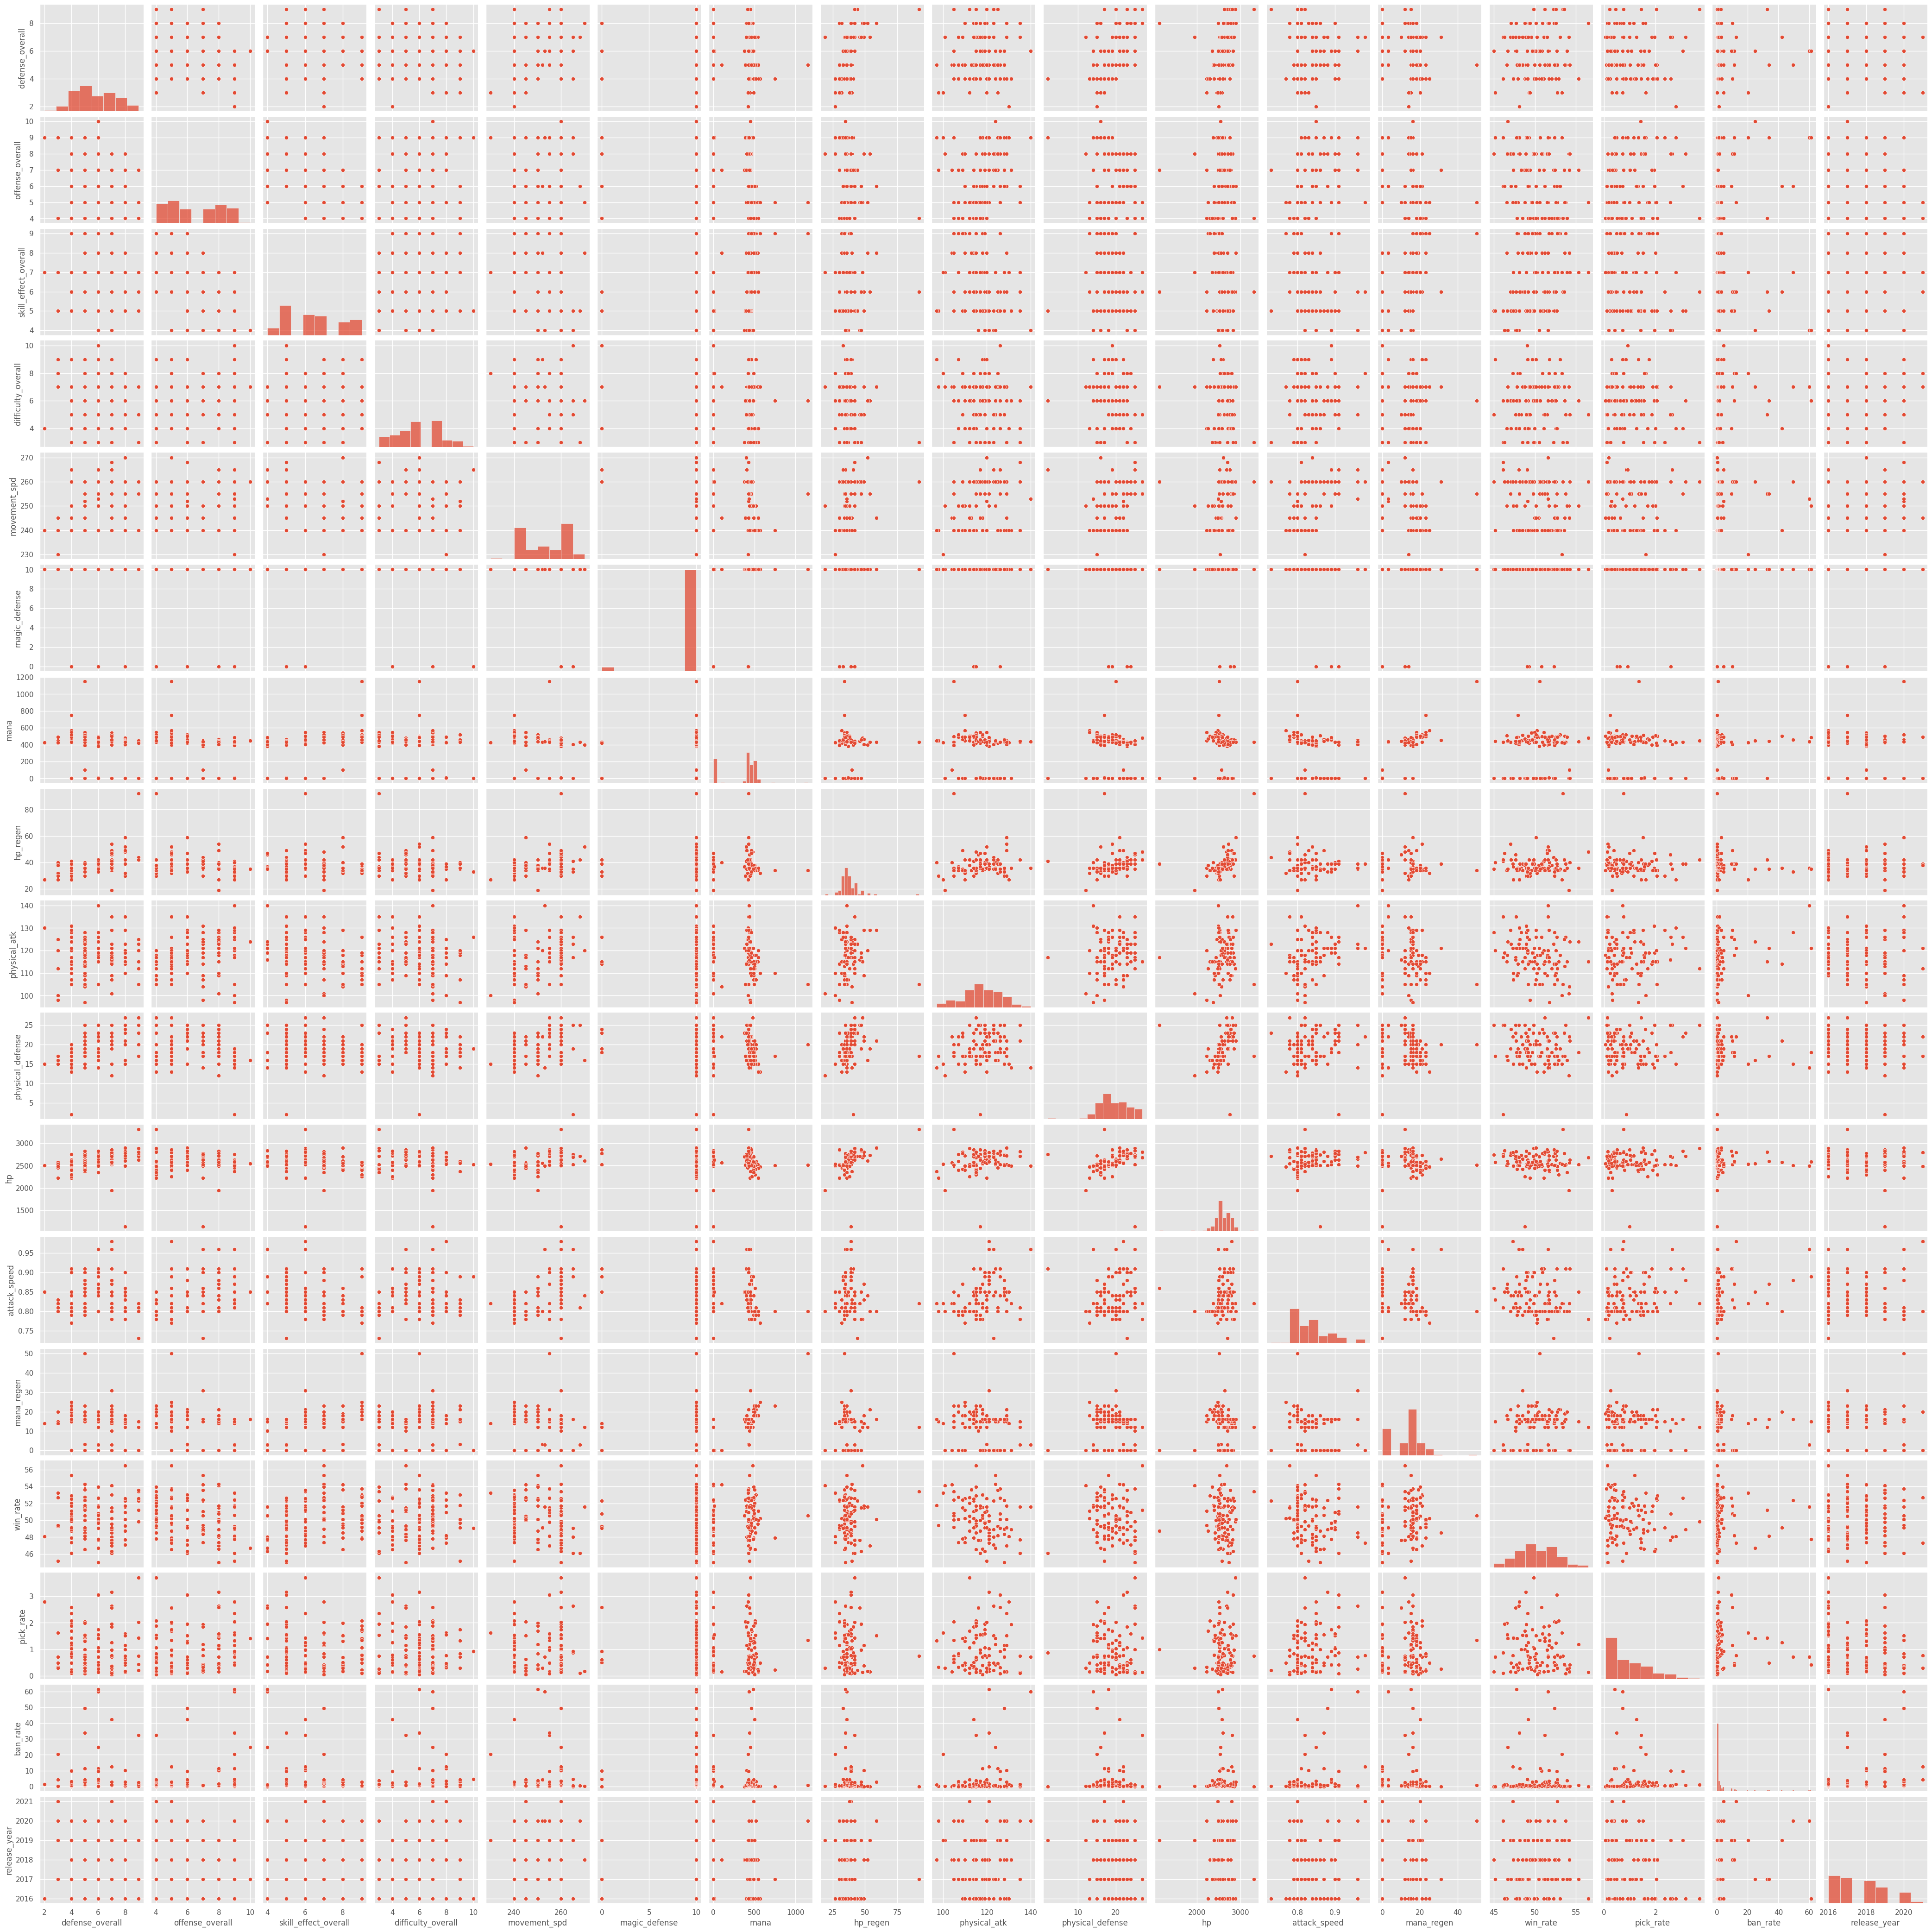

In [ ]:
sns.pairplot(td_MLBB)

### 2.3 visualisasi grafik batang untuk setiap  fitur datasheet

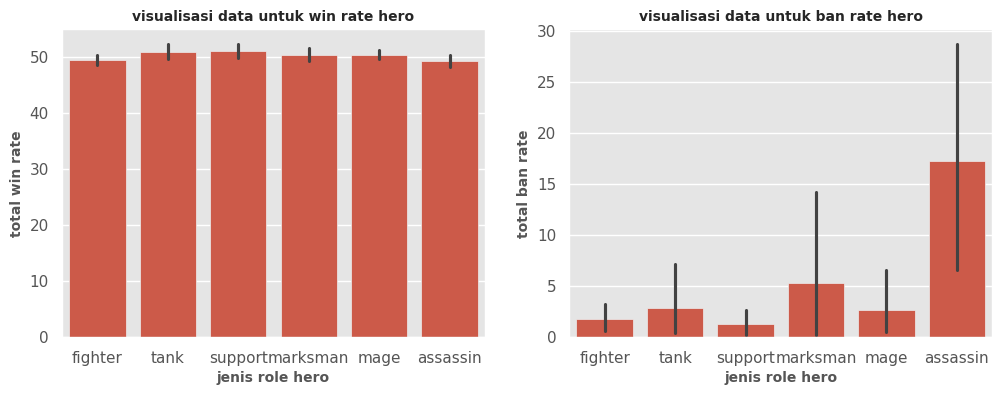

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(12,4))
sns.barplot(x = 'role', y= 'win_rate', data = td_MLBB, ax=ax[0])
sns.barplot(x = 'role', y= 'ban_rate', data = td_MLBB, ax=ax[1])

ax[0].set_xlabel("jenis role hero", fontsize=10, fontweight='bold')
ax[0].set_ylabel("total win rate", fontsize=10, fontweight='bold')

ax[1].set_xlabel("jenis role hero", fontsize=10, fontweight='bold')
ax[1].set_ylabel("total ban rate", fontsize=10, fontweight='bold')

ax[0].set_title("visualisasi data untuk win rate hero", fontsize=10, fontweight='bold')
ax[1].set_title("visualisasi data untuk ban rate hero", fontsize=10, fontweight='bold')

plt.show()

In [ ]:
fig = px.scatter(td_MLBB, x="hero_name", y="win_rate",
                size="ban_rate", color="role")

# showing the plot
fig.show()

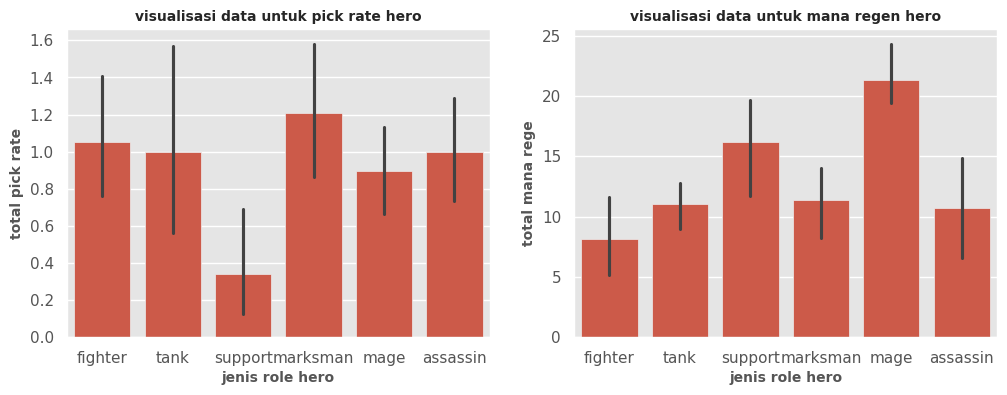

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(12, 4))
sns.barplot(x = 'role', y = 'pick_rate', data = td_MLBB, ax = ax[0])
sns.barplot(x = 'role', y = 'mana_regen', data = td_MLBB, ax = ax[1])

ax[0].set_xlabel("jenis role hero", fontsize=10, fontweight='bold')
ax[0].set_ylabel("total pick rate", fontsize=10, fontweight='bold')

ax[1].set_xlabel("jenis role hero", fontsize=10, fontweight='bold')
ax[1].set_ylabel("total mana rege", fontsize=10, fontweight='bold')

ax[0].set_title("visualisasi data untuk pick rate hero", fontsize=10, fontweight='bold')
ax[1].set_title("visualisasi data untuk mana regen hero", fontsize=10, fontweight='bold')

plt.show()

In [ ]:
fig = px.scatter(td_MLBB, x="hero_name", y="pick_rate",
                size="mana_regen", color="role")

# showing the plot
fig.show()

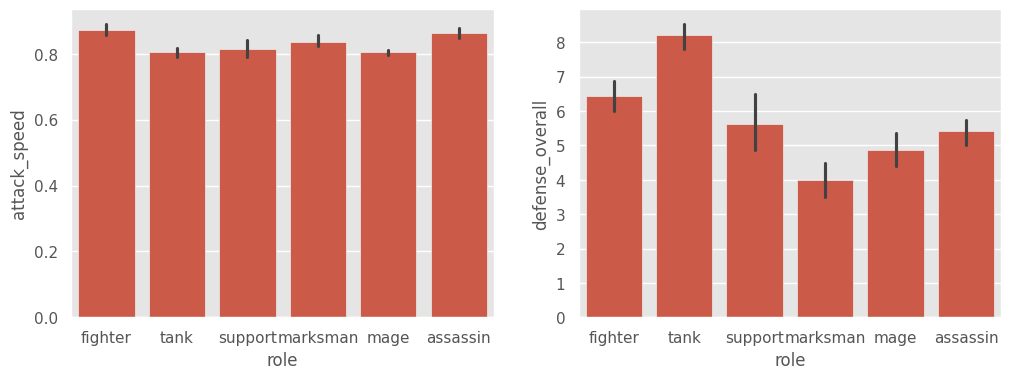

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(12, 4))
sns.barplot(x = 'role', y= 'attack_speed', data = td_MLBB, ax=ax[0])
sns.barplot(x = 'role', y = 'defense_overall', data = td_MLBB)
plt.show()

In [ ]:
fig = px.scatter(td_MLBB, x="hero_name", y="attack_speed",
                size="defense_overall", color="role")

# showing the plot
fig.show()

<Axes: xlabel='role', ylabel='offense_overall'>

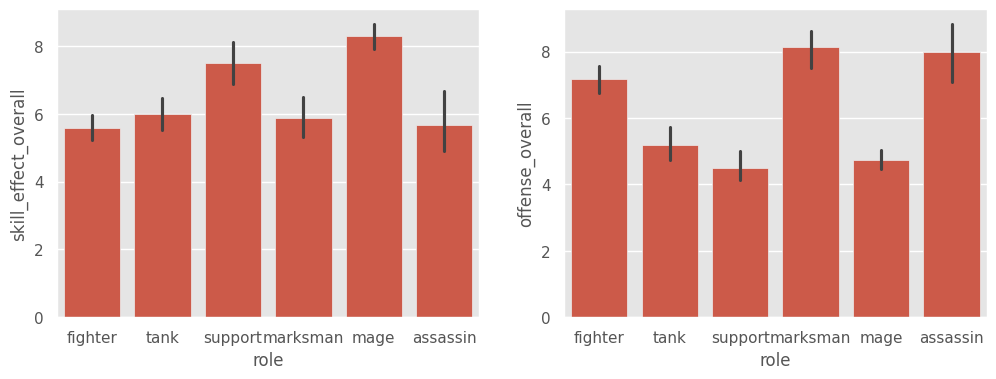

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(12,4))
sns.barplot(x = 'role', y = 'skill_effect_overall', data = td_MLBB, ax=ax[0])
sns.barplot(x = 'role', y = 'offense_overall', data = td_MLBB, ax=ax[1])

In [ ]:
fig = px.scatter(td_MLBB, x="hero_name", y="skill_effect_overall",
                size="offense_overall", color="role")

# showing the plot
fig.show()

<Axes: xlabel='role', ylabel='movement_spd'>

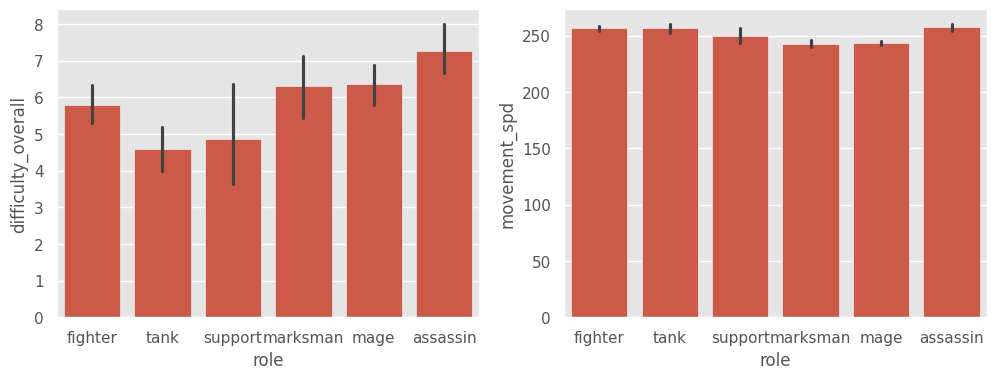

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(12,4))
sns.barplot(x = 'role', y= 'difficulty_overall', data = td_MLBB, ax=ax[0])
sns.barplot(x = 'role', y= 'movement_spd', data = td_MLBB, ax = ax[1])

In [ ]:
fig = px.scatter(td_MLBB, x="hero_name", y="difficulty_overall",
                size="movement_spd", color="role")

# showing the plot
fig.show()

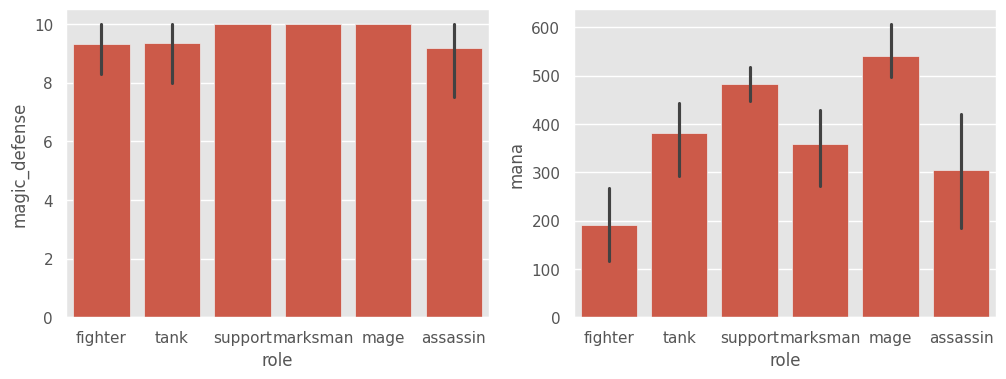

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(12,4))
sns.barplot(x = 'role', y= 'magic_defense', data = td_MLBB, ax=ax[0])
sns.barplot(x = 'role', y= 'mana', data = td_MLBB)
plt.show()

In [ ]:
fig = px.scatter(td_MLBB, x="hero_name", y="mana",
                size="magic_defense", color="role")

# showing the plot
fig.show()

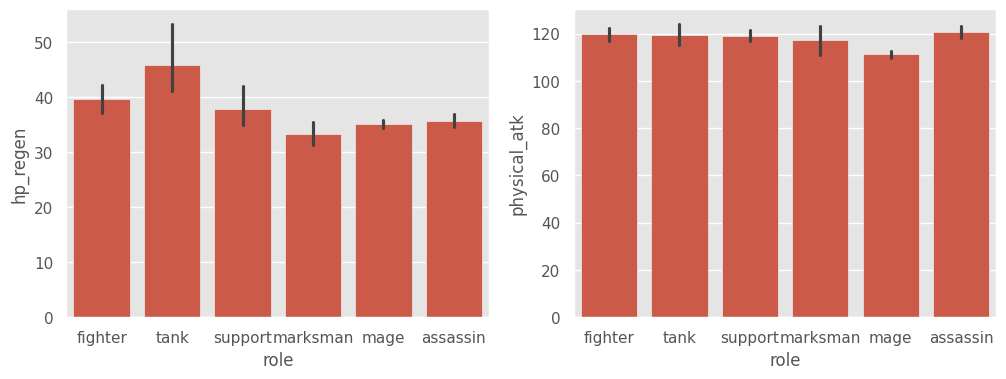

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(12,4))
sns.barplot(x = 'role', y= 'hp_regen', data = td_MLBB, ax=ax[0])
sns.barplot(x = 'role', y= 'physical_atk', data = td_MLBB)
plt.show()

In [ ]:
fig = px.scatter(td_MLBB, x="hero_name", y="physical_atk",
                size="hp_regen", color="role")

# showing the plot
fig.show()

<Axes: xlabel='role', ylabel='hp'>

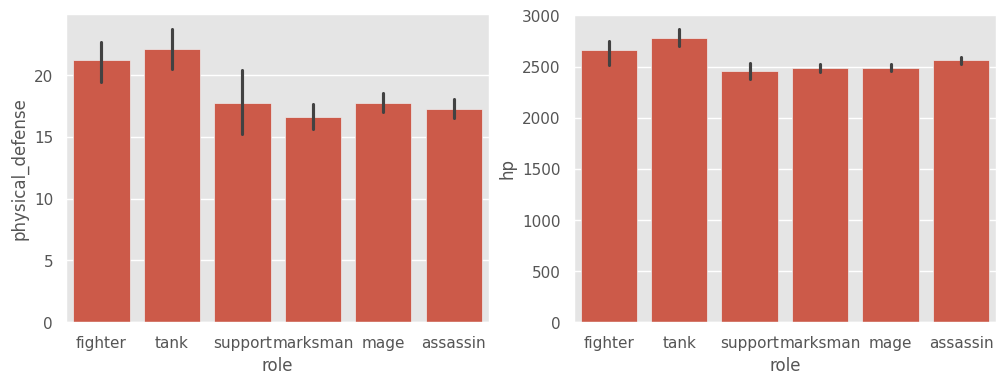

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(12,4))
sns.barplot(x = 'role', y= 'physical_defense', data = td_MLBB, ax=ax[0])
sns.barplot(x = 'role', y= 'hp', data = td_MLBB, ax=ax[1])

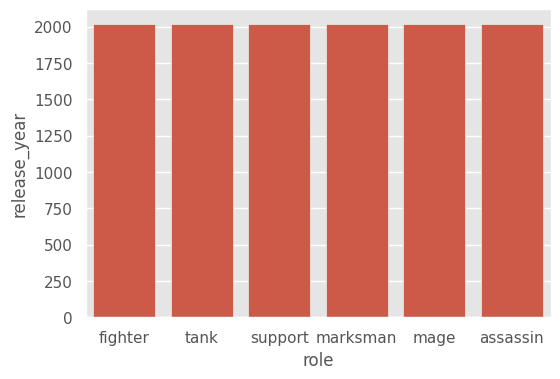

In [ ]:
plt.figure(figsize=(6,4))
sns.barplot(x = 'role', y= 'release_year', data = td_MLBB)
plt.show()

### 2.4 Analisis Frekuensi dengan Histogram

#### 2.4.1 Analisis Frekuensi defense_overall & offense_overall

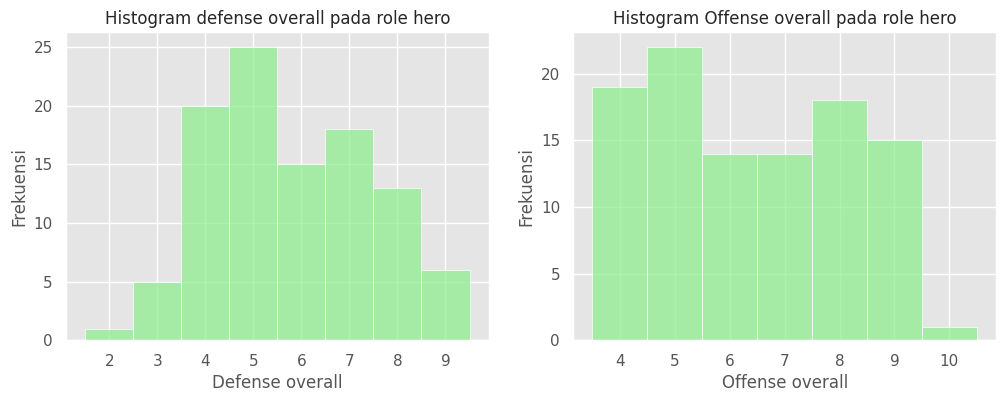

In [ ]:
# atur ukuran canvas untuk grafik histogram
fig, ax = plt.subplots(1,2, figsize=(12,4))
# code program untuk histogram defense overall
sns.histplot(td_MLBB['defense_overall'], binwidth=1,
             binrange=(td_MLBB['defense_overall'].min()-0.5, td_MLBB['defense_overall'].max()+0.5), ec="w", color="lightgreen", ax=ax[0])

# code program untuk histogram offense_overall
sns.histplot(td_MLBB['offense_overall'], binwidth=1,
             binrange=(td_MLBB['offense_overall'].min()-0.5, td_MLBB['offense_overall'].max()+0.5), ec="w", color="lightgreen", ax=ax[1])

# code program untuk mengatur sumbu x dan y pada canvas 0 dan 1
ax[0].set_ylabel("Frekuensi", fontsize=12)
ax[0].set_xlabel("Defense overall", fontsize=12)

ax[1].set_ylabel("Frekuensi", fontsize=12)
ax[1].set_xlabel("Offense overall", fontsize=12)

# code program untuk mengatur title pada grafik
ax[0].set_title("Histogram defense overall pada role hero", fontsize=12)
ax[1].set_title("Histogram Offense overall pada role hero", fontsize=12)
plt.show()

#### 2.4.2 Analisis Histogram skill effect overall & difficulty overall

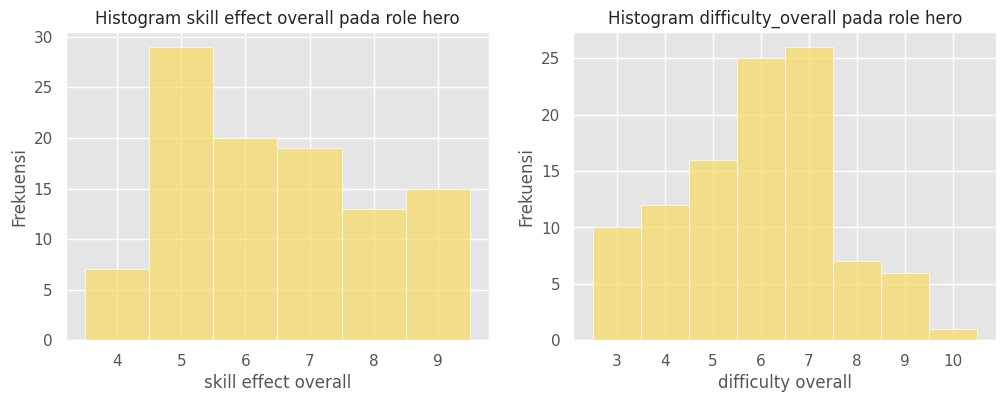

In [ ]:
# atur ukuran canvas untuk grafik histogram
fig, ax = plt.subplots(1,2, figsize=(12,4))
# code program untuk histogram defense overall
sns.histplot(td_MLBB['skill_effect_overall'], binwidth=1,
             binrange=(td_MLBB['skill_effect_overall'].min()-0.5, td_MLBB['skill_effect_overall'].max()+0.5), ec="w", color="#F7DB6A", ax=ax[0])

# code program untuk histogram offense_overall
sns.histplot(td_MLBB['difficulty_overall'], binwidth=1,
             binrange=(td_MLBB['difficulty_overall'].min()-0.5, td_MLBB['difficulty_overall'].max()+0.5), ec="w", color="#F7DB6A", ax=ax[1])

# code program untuk mengatur sumbu x dan y pada canvas 0 dan 1
ax[0].set_ylabel("Frekuensi", fontsize=12)
ax[0].set_xlabel("skill effect overall", fontsize=12)

ax[1].set_ylabel("Frekuensi", fontsize=12)
ax[1].set_xlabel("difficulty overall", fontsize=12)

# code program untuk mengatur title pada grafik
ax[0].set_title("Histogram skill effect overall pada role hero", fontsize=12)
ax[1].set_title("Histogram difficulty_overall pada role hero", fontsize=12)
plt.show()

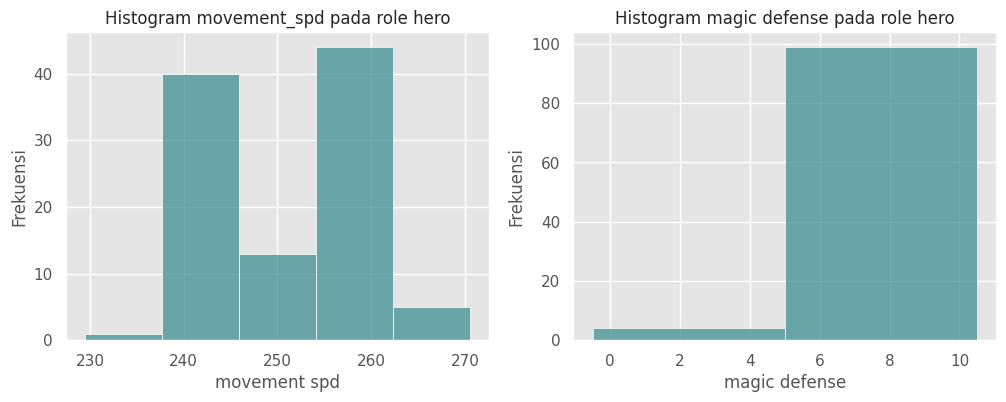

In [ ]:
# atur ukuran canvas untuk grafik histogram
fig, ax = plt.subplots(1,2, figsize=(12,4))
# code program untuk histogram defense overall
sns.histplot(td_MLBB['movement_spd'], binwidth=8,
             binrange=(td_MLBB['movement_spd'].min()-0.5, td_MLBB['movement_spd'].max()+0.5), ec="w", color="#408E91", ax=ax[0])

# code program untuk histogram offense_overall
sns.histplot(td_MLBB['magic_defense'], binwidth=5,
             binrange=(td_MLBB['magic_defense'].min()-0.5, td_MLBB['magic_defense'].max()+0.5), ec="w", color="#408E91", ax=ax[1])

# code program untuk mengatur sumbu x dan y pada canvas 0 dan 1
ax[0].set_ylabel("Frekuensi", fontsize=12)
ax[0].set_xlabel("movement spd", fontsize=12)

ax[1].set_ylabel("Frekuensi", fontsize=12)
ax[1].set_xlabel("magic defense", fontsize=12)

# code program untuk mengatur title pada grafik
ax[0].set_title("Histogram movement_spd pada role hero", fontsize=12)
ax[1].set_title("Histogram magic defense pada role hero", fontsize=12)
plt.show()

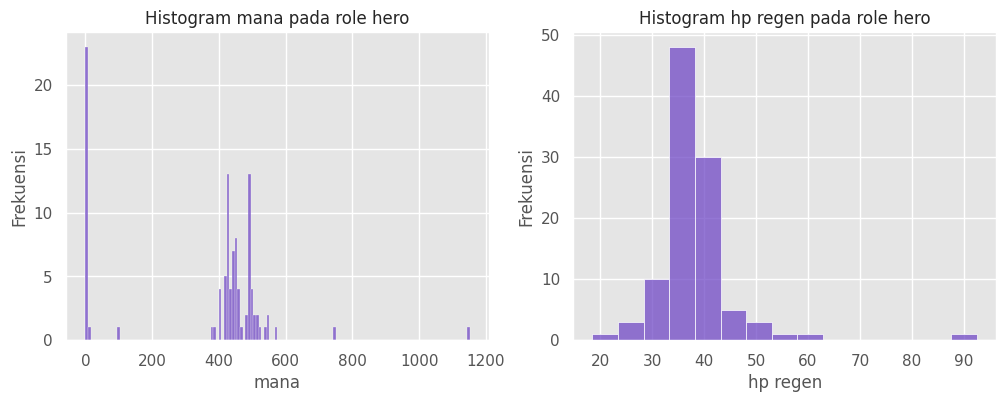

In [ ]:
# atur ukuran canvas untuk grafik histogram
fig, ax = plt.subplots(1,2, figsize=(12,4))
# code program untuk histogram defense overall
sns.histplot(td_MLBB['mana'], binwidth=8,
             binrange=(td_MLBB['mana'].min()-0.5, td_MLBB['mana'].max()+0.5), ec="w", color="#7149C6", ax=ax[0])

# code program untuk histogram offense_overall
sns.histplot(td_MLBB['hp_regen'], binwidth=5,
             binrange=(td_MLBB['hp_regen'].min()-0.5, td_MLBB['hp_regen'].max()+0.5), ec="w", color="#7149C6", ax=ax[1])

# code program untuk mengatur sumbu x dan y pada canvas 0 dan 1
ax[0].set_ylabel("Frekuensi", fontsize=12)
ax[0].set_xlabel("mana", fontsize=12)

ax[1].set_ylabel("Frekuensi", fontsize=12)
ax[1].set_xlabel("hp regen", fontsize=12)

# code program untuk mengatur title pada grafik
ax[0].set_title("Histogram mana pada role hero", fontsize=12)
ax[1].set_title("Histogram hp regen pada role hero", fontsize=12)
plt.show()

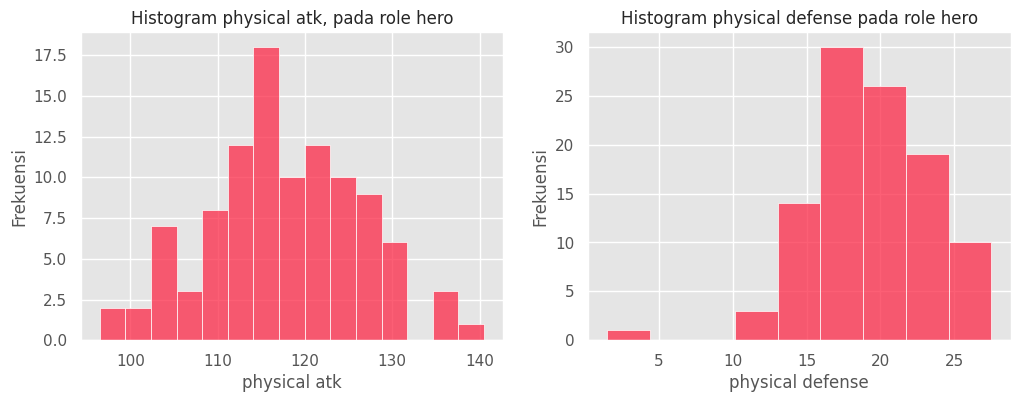

In [ ]:
# atur ukuran canvas untuk grafik histogram
fig, ax = plt.subplots(1,2, figsize=(12,4))
# code program untuk histogram defense overall
sns.histplot(td_MLBB['physical_atk'], binwidth=3,
             binrange=(td_MLBB['physical_atk'].min()-0.5, td_MLBB['physical_atk'].max()+0.5), ec="w", color="#FC2947", ax=ax[0])

# code program untuk histogram offense_overall
sns.histplot(td_MLBB['physical_defense'], binwidth=3,
             binrange=(td_MLBB['physical_defense'].min()-0.5, td_MLBB['physical_defense'].max()+0.5), ec="w", color="#FC2947", ax=ax[1])

# code program untuk mengatur sumbu x dan y pada canvas 0 dan 1
ax[0].set_ylabel("Frekuensi", fontsize=12)
ax[0].set_xlabel("physical atk", fontsize=12)

ax[1].set_ylabel("Frekuensi", fontsize=12)
ax[1].set_xlabel("physical defense", fontsize=12)

# code program untuk mengatur title pada grafik
ax[0].set_title("Histogram physical atk, pada role hero", fontsize=12)
ax[1].set_title("Histogram physical defense pada role hero", fontsize=12)
plt.show()

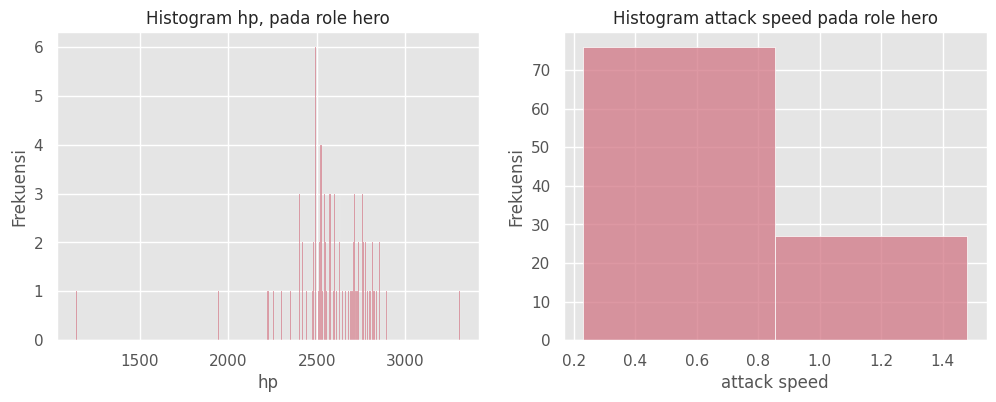

In [ ]:
# atur ukuran canvas untuk grafik histogram
fig, ax = plt.subplots(1,2, figsize=(12,4))
# code program untuk histogram defense overall
sns.histplot(td_MLBB['hp'], binwidth=5,
             binrange=(td_MLBB['hp'].min()-0.5, td_MLBB['hp'].max()+0.5), ec="w", color="#D27685", ax=ax[0])

# code program untuk histogram offense_overall
sns.histplot(td_MLBB['attack_speed'], binwidth=0.5,
             binrange=(td_MLBB['attack_speed'].min()-0.5, td_MLBB['attack_speed'].max()+0.5), ec="w", color="#D27685", ax=ax[1])

# code program untuk mengatur sumbu x dan y pada canvas 0 dan 1
ax[0].set_ylabel("Frekuensi", fontsize=12)
ax[0].set_xlabel("hp", fontsize=12)

ax[1].set_ylabel("Frekuensi", fontsize=12)
ax[1].set_xlabel("attack speed", fontsize=12)

# code program untuk mengatur title pada grafik
ax[0].set_title("Histogram hp, pada role hero", fontsize=12)
ax[1].set_title("Histogram attack speed pada role hero", fontsize=12)
plt.show()

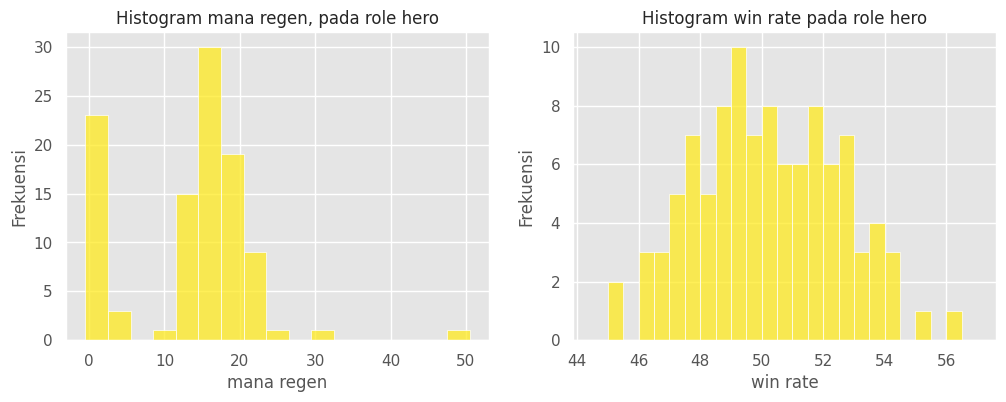

In [ ]:
# atur ukuran canvas untuk grafik histogram
fig, ax = plt.subplots(1,2, figsize=(12,4))
# code program untuk histogram defense overall
sns.histplot(td_MLBB['mana_regen'], binwidth=3,
             binrange=(td_MLBB['mana_regen'].min()-0.5, td_MLBB['mana_regen'].max()+0.5), ec="w", color="#FFEA20", ax=ax[0])

# code program untuk histogram offense_overall
sns.histplot(td_MLBB['win_rate'], binwidth=0.5,
             binrange=(td_MLBB['win_rate'].min()-0.5, td_MLBB['win_rate'].max()+0.5), ec="w", color="#FFEA20", ax=ax[1])

# code program untuk mengatur sumbu x dan y pada canvas 0 dan 1
ax[0].set_ylabel("Frekuensi", fontsize=12)
ax[0].set_xlabel("mana regen", fontsize=12)

ax[1].set_ylabel("Frekuensi", fontsize=12)
ax[1].set_xlabel("win rate", fontsize=12)

# code program untuk mengatur title pada grafik
ax[0].set_title("Histogram mana regen, pada role hero", fontsize=12)
ax[1].set_title("Histogram win rate pada role hero", fontsize=12)
plt.show()

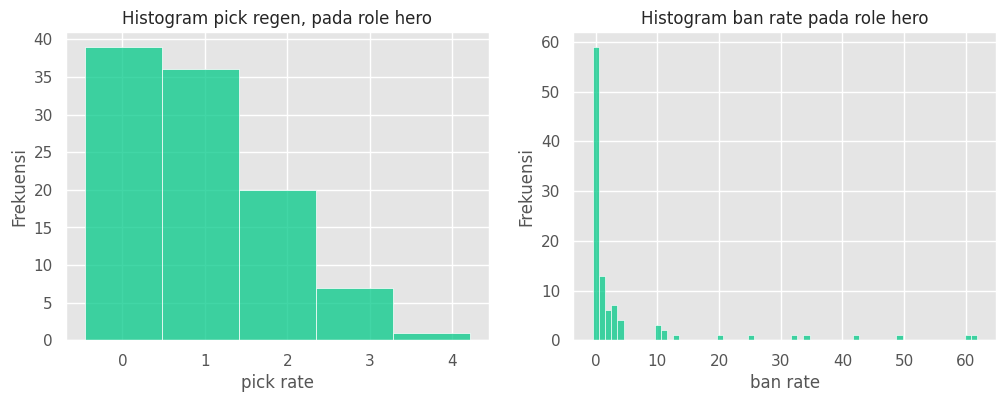

In [ ]:
# atur ukuran canvas untuk grafik histogram
fig, ax = plt.subplots(1,2, figsize=(12,4))
# code program untuk histogram defense overall
sns.histplot(td_MLBB['pick_rate'], binwidth=1,
             binrange=(td_MLBB['pick_rate'].min()-0.5, td_MLBB['pick_rate'].max()+0.5), ec="w", color="#03C988", ax=ax[0])

# code program untuk histogram offense_overall
sns.histplot(td_MLBB['ban_rate'], binwidth=1,
             binrange=(td_MLBB['ban_rate'].min()-0.5, td_MLBB['ban_rate'].max()+0.5), ec="w", color="#03C988", ax=ax[1])

# code program untuk mengatur sumbu x dan y pada canvas 0 dan 1
ax[0].set_ylabel("Frekuensi", fontsize=12)
ax[0].set_xlabel("pick rate", fontsize=12)

ax[1].set_ylabel("Frekuensi", fontsize=12)
ax[1].set_xlabel("ban rate", fontsize=12)

# code program untuk mengatur title pada grafik
ax[0].set_title("Histogram pick regen, pada role hero", fontsize=12)
ax[1].set_title("Histogram ban rate pada role hero", fontsize=12)
plt.show()

In [ ]:
td_MLBB.head()

,hero_name,role,defense_overall,offense_overall,skill_effect_overall,difficulty_overall,movement_spd,magic_defense,mana,hp_regen,physical_atk,physical_defense,hp,attack_speed,mana_regen,win_rate,pick_rate,ban_rate,release_year
0,Terizla,fighter,7.0,8.0,6.0,6.0,255,10,430,54,129,19,2728,0.80,21.0,47.00,0.15,0.02,2019
1,Martis,fighter,6.0,8.0,5.0,5.0,260,10,0,35,128,25,2738,0.86,0.0,45.00,0.15,0.02,2018
2,Grock,tank,8.0,5.0,6.0,4.0,260,10,430,42,135,21,2819,0.81,12.0,47.69,0.14,0.02,2017
3,Carmilla,support,5.0,5.0,9.0,5.0,255,10,430,39,126,25,2528,0.91,16.0,53.76,0.08,0.02,2020
4,Irithel,marksman,5.0,5.0,8.0,7.0,260,10,438,35,118,17,2540,0.82,15.0,51.52,0.38,0.03,2017


In [ ]:
td_MLBB.describe().T

,count,mean,std,min,25%,50%,75%,max
defense_overall,103.0,5.786408,1.672444,2.00,4.50,6.00,7.000,9.00
offense_overall,103.0,6.378641,1.771875,4.00,5.00,6.00,8.000,10.00
skill_effect_overall,103.0,6.456311,1.538886,4.00,5.00,6.00,8.000,9.00
difficulty_overall,103.0,5.922330,1.649060,3.00,5.00,6.00,7.000,10.00
movement_spd,103.0,251.048544,9.261324,230.00,240.00,250.00,260.000,270.00
magic_defense,103.0,9.611650,1.941462,0.00,10.00,10.00,10.000,10.00
mana,103.0,358.844660,217.446805,0.00,385.00,438.00,490.000,1150.00
hp_regen,103.0,37.961165,7.818934,19.00,34.00,36.00,40.000,92.00
physical_atk,103.0,117.504854,8.451562,97.00,112.00,117.00,123.000,140.00
physical_defense,103.0,19.135922,3.865505,2.00,17.00,19.00,22.000,27.00
